In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv('../dataset/mental_health_score_prediction.csv')
df.head()

,age,gender,daily_screen_time_hours,social_media_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,eats_healthy,caffeine_intake_mg_per_day,gaming_hours,mental_health_score
0,51,0,4.8,4.1,6.6,6,6,10,0.7,1,125.2,1.7,32
1,64,1,3.9,2.7,4.5,7,5,6,4.3,1,150.4,1.5,75
2,41,2,10.5,3.0,7.1,9,5,5,3.1,0,187.9,1.7,22
3,27,2,8.8,3.3,5.1,9,10,5,0.0,1,73.6,0.4,22
4,55,1,5.9,1.1,7.4,2,8,7,3.0,1,217.5,0.8,64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2000 non-null   int64  
 1   gender                            2000 non-null   int64  
 2   daily_screen_time_hours           2000 non-null   float64
 3   social_media_hours                2000 non-null   float64
 4   sleep_duration_hours              2000 non-null   float64
 5   sleep_quality                     2000 non-null   int64  
 6   mood_rating                       2000 non-null   int64  
 7   stress_level                      2000 non-null   int64  
 8   physical_activity_hours_per_week  2000 non-null   float64
 9   eats_healthy                      2000 non-null   int64  
 10  caffeine_intake_mg_per_day        2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  mental

In [6]:
df.describe()

,age,gender,daily_screen_time_hours,social_media_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,eats_healthy,caffeine_intake_mg_per_day,gaming_hours,mental_health_score
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.000000
mean,38.805500,0.6240,6.025600,2.039200,6.537550,5.567000,5.591000,5.541500,3.087150,0.507500,148.07970,1.2795,49.650500
std,14.929203,0.6464,1.974123,1.133435,1.203856,2.826217,2.899814,2.885731,1.885258,0.500069,48.86066,0.8945,17.546717
min,13.000000,0.0000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.80000,0.0000,20.000000
25%,26.000000,0.0000,4.700000,1.200000,5.700000,3.000000,3.000000,3.000000,1.600000,0.000000,113.90000,0.6000,35.000000
50%,39.000000,1.0000,6.000000,2.000000,6.600000,6.000000,6.000000,6.000000,3.000000,1.000000,147.45000,1.2000,49.000000
75%,51.000000,1.0000,7.325000,2.800000,7.400000,8.000000,8.000000,8.000000,4.400000,1.000000,180.70000,1.9000,64.250000
max,64.000000,2.0000,13.300000,5.800000,10.000000,10.000000,10.000000,10.000000,9.700000,1.000000,364.90000,4.0000,80.000000


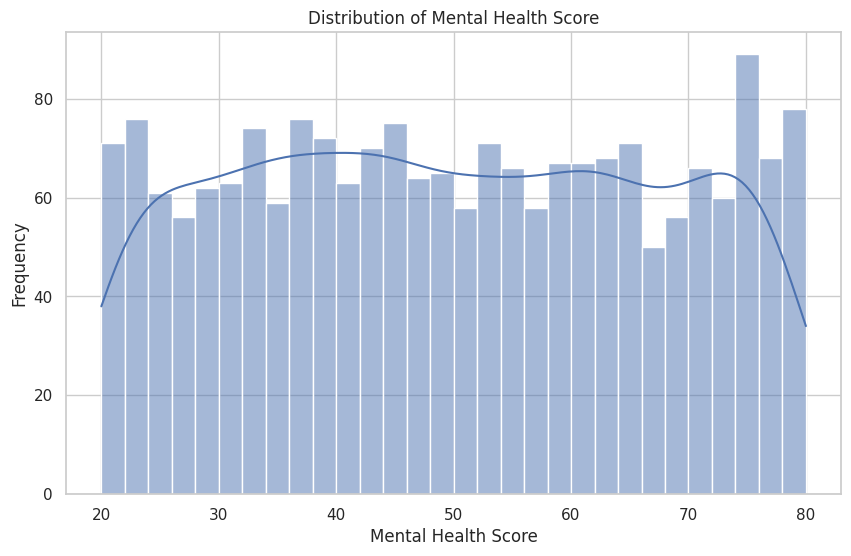

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mental_health_score'], bins=30, kde=True) 
plt.title('Distribution of Mental Health Score')
plt.xlabel('Mental Health Score')
plt.ylabel('Frequency')
plt.show()

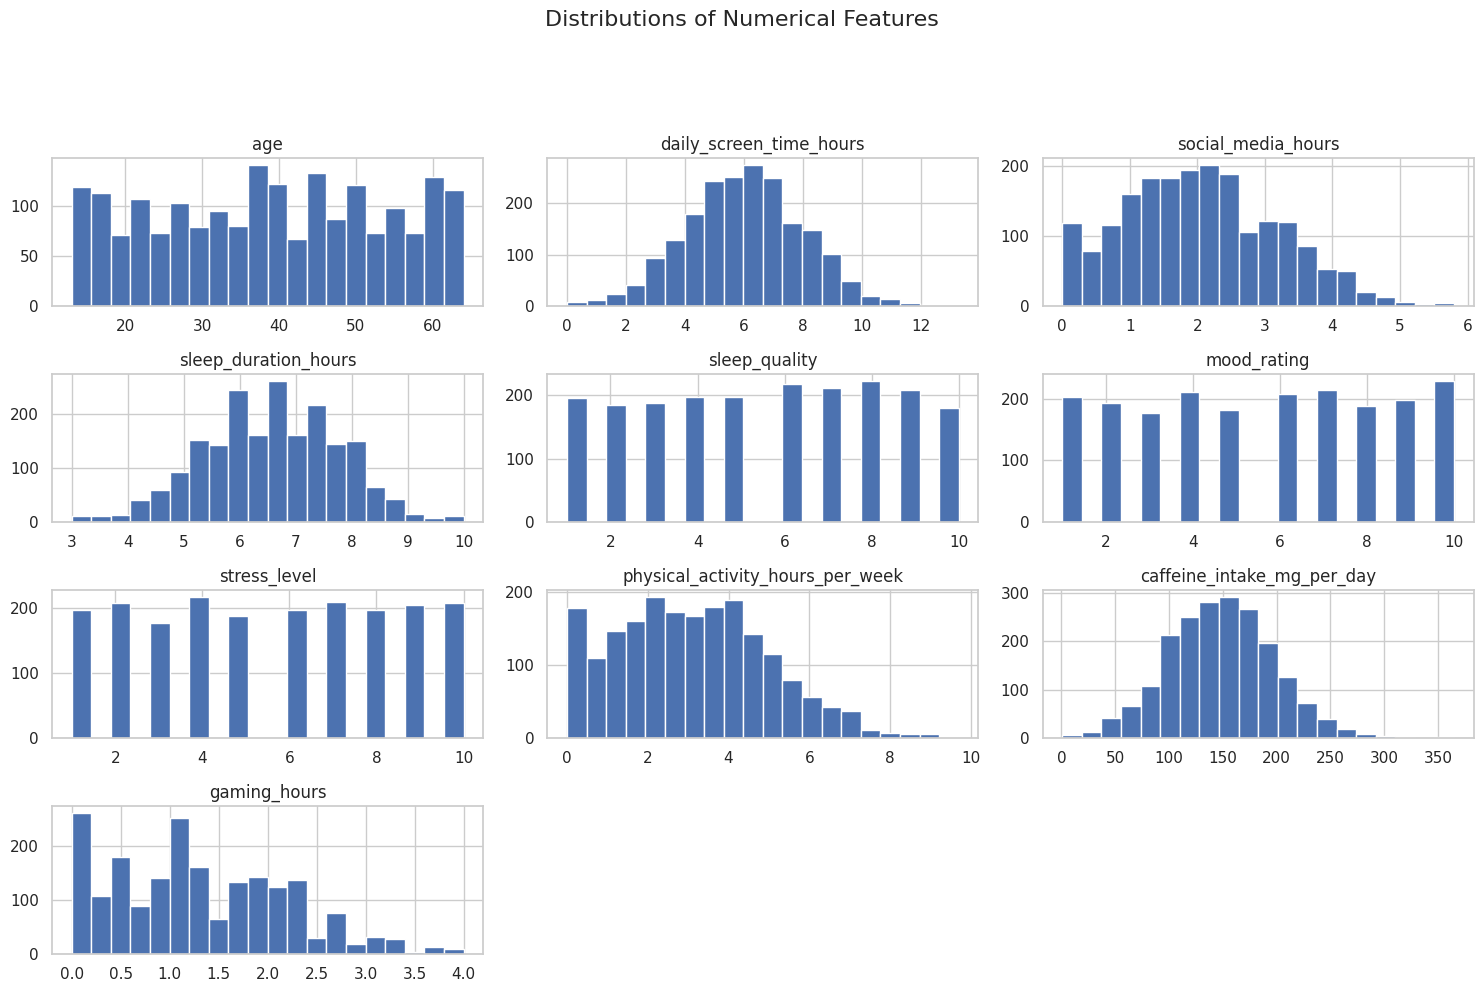

In [8]:
numerical_features = ['age', 'daily_screen_time_hours', 'social_media_hours',
                      'sleep_duration_hours', 'sleep_quality', 'mood_rating',
                      'stress_level', 'physical_activity_hours_per_week',
                      'caffeine_intake_mg_per_day', 'gaming_hours'] 

df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

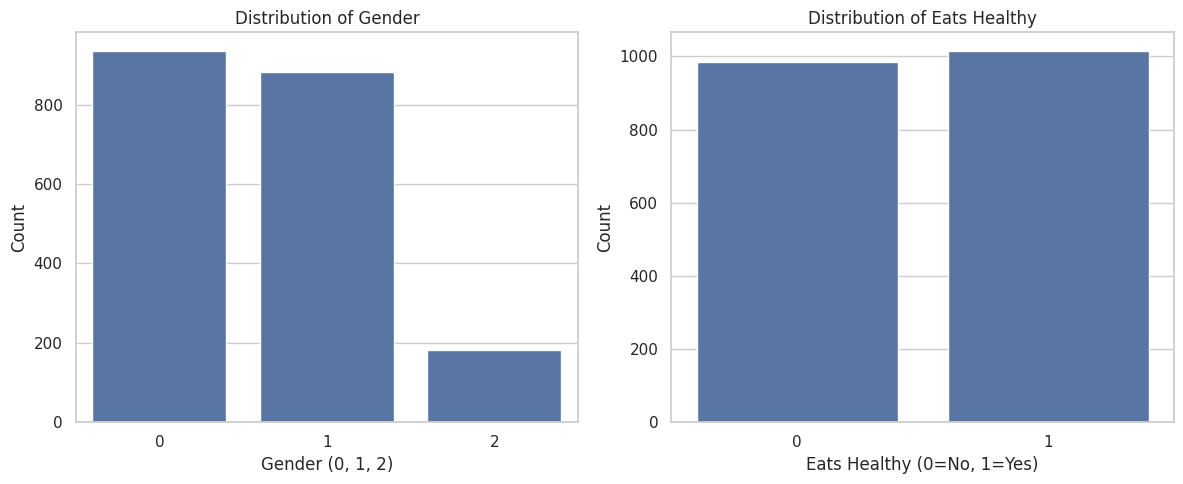

In [9]:
categorical_features = ['gender', 'eats_healthy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) 
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0, 1, 2)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='eats_healthy', data=df)
plt.title('Distribution of Eats Healthy')
plt.xlabel('Eats Healthy (0=No, 1=Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

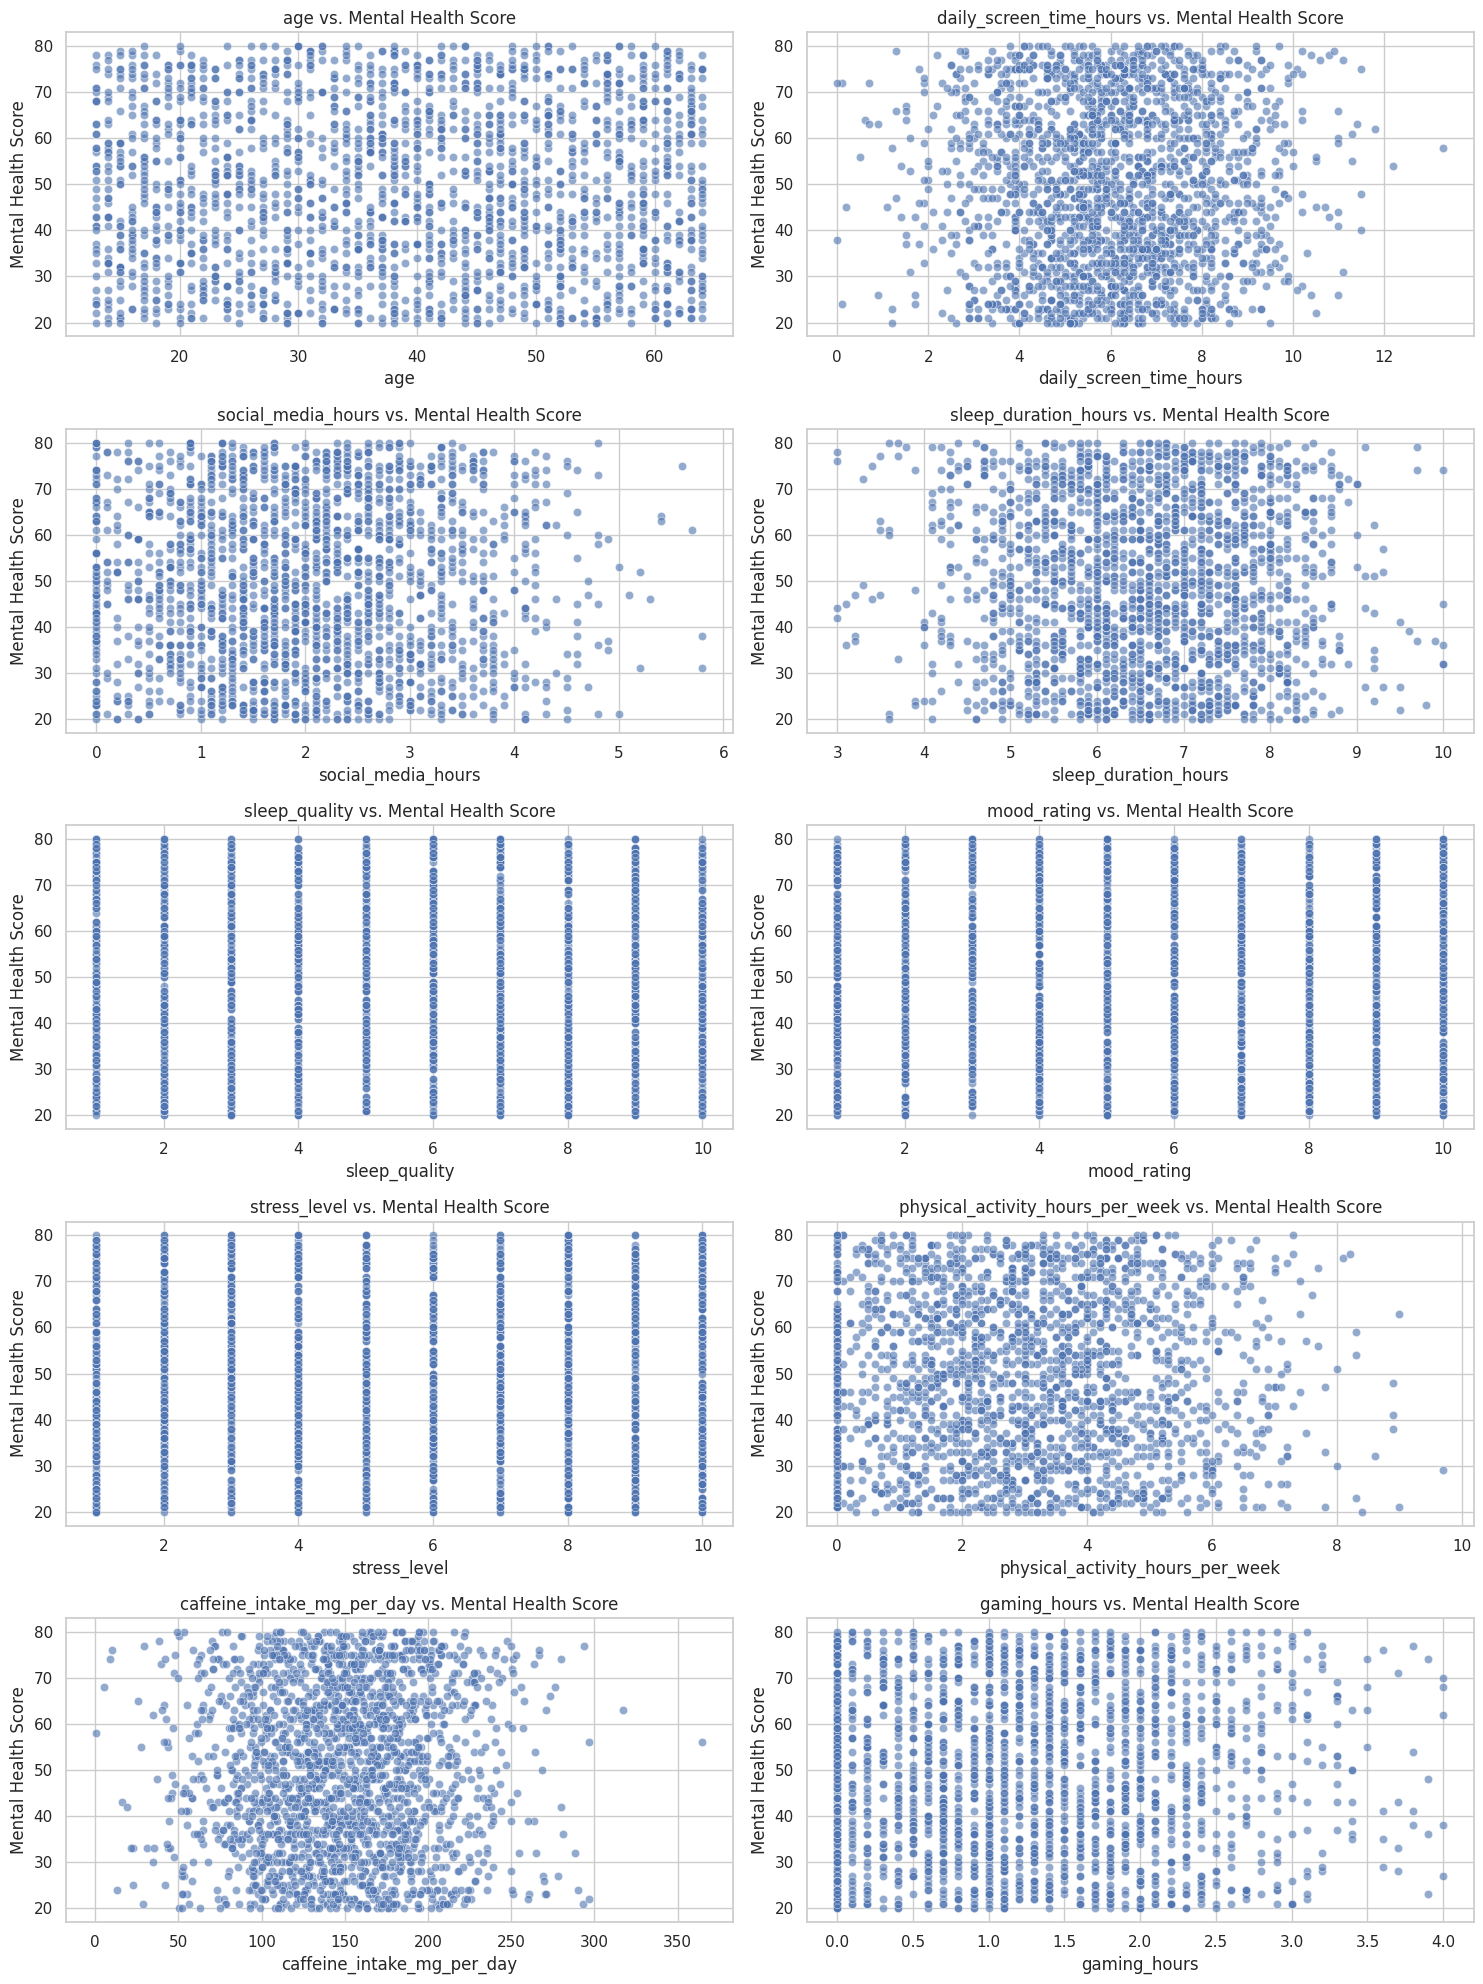

In [10]:
numerical_features_for_scatter = numerical_features 

fig, axes = plt.subplots(nrows=len(numerical_features_for_scatter)//2 + len(numerical_features_for_scatter)%2,
                         ncols=2, figsize=(15, len(numerical_features_for_scatter)*2)) 
axes = axes.flatten() 

for i, col in enumerate(numerical_features_for_scatter):
    sns.scatterplot(x=col, y='mental_health_score', data=df, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs. Mental Health Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Mental Health Score')

if len(numerical_features_for_scatter) < len(axes):
    for j in range(len(numerical_features_for_scatter), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

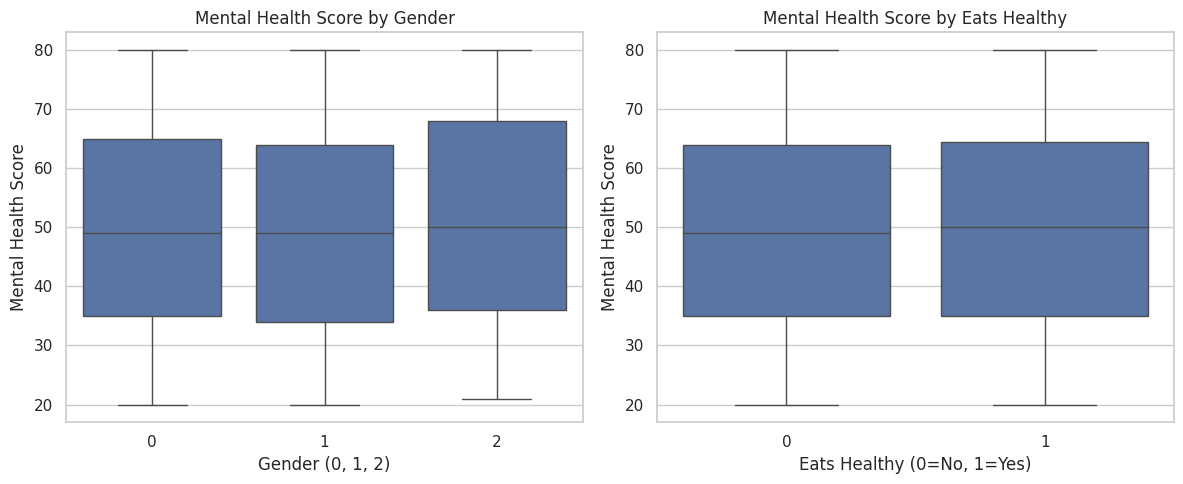

In [11]:
categorical_features_for_boxplot = categorical_features 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='mental_health_score', data=df)
plt.title('Mental Health Score by Gender')
plt.xlabel('Gender (0, 1, 2)')
plt.ylabel('Mental Health Score')

plt.subplot(1, 2, 2)
sns.boxplot(x='eats_healthy', y='mental_health_score', data=df)
plt.title('Mental Health Score by Eats Healthy')
plt.xlabel('Eats Healthy (0=No, 1=Yes)')
plt.ylabel('Mental Health Score')

plt.tight_layout()
plt.show()

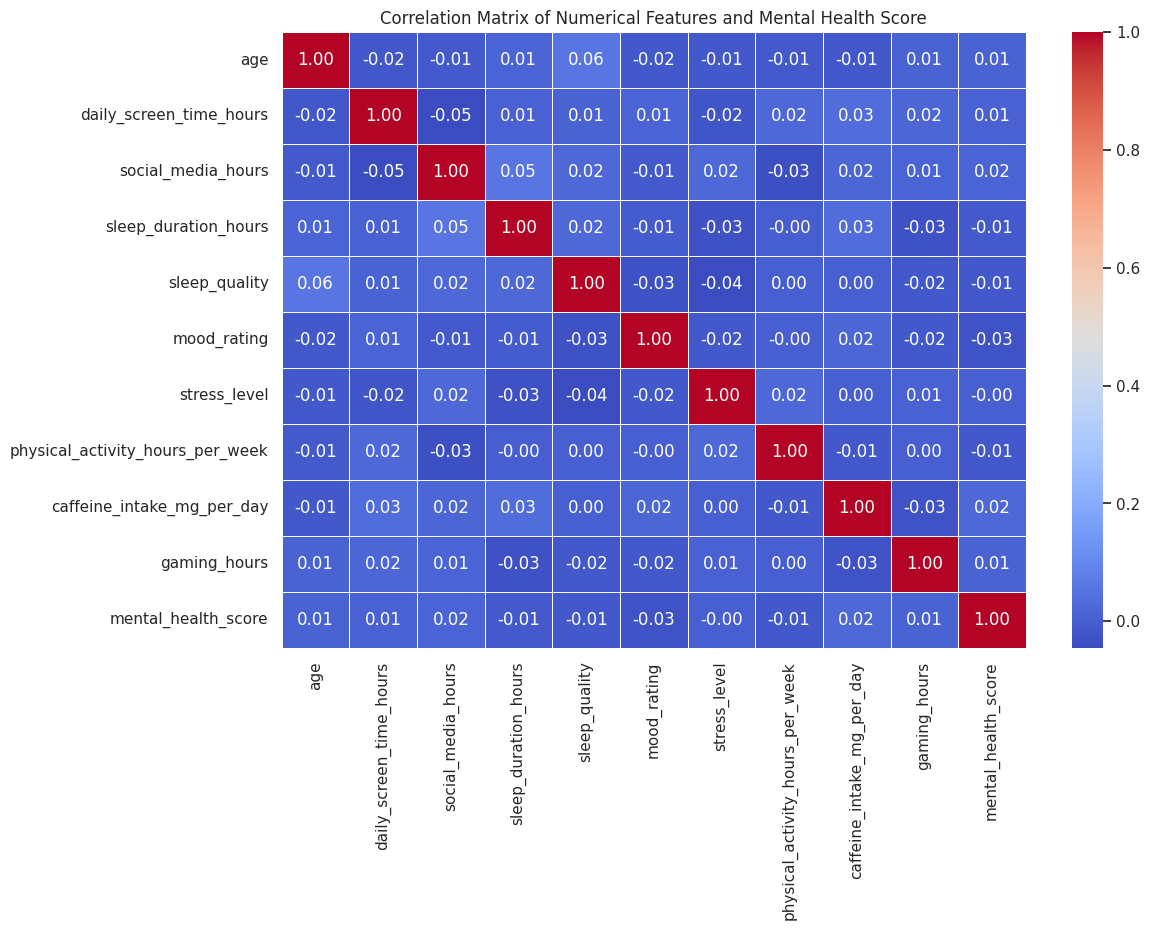

In [12]:
numerical_features_for_corr = ['age', 'daily_screen_time_hours', 'social_media_hours',
                               'sleep_duration_hours', 'sleep_quality', 'mood_rating',
                               'stress_level', 'physical_activity_hours_per_week',
                               'caffeine_intake_mg_per_day', 'gaming_hours']
correlation_matrix = df[numerical_features_for_corr + ['mental_health_score']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Mental Health Score')
plt.show()


--- Correlation Heatmap ---


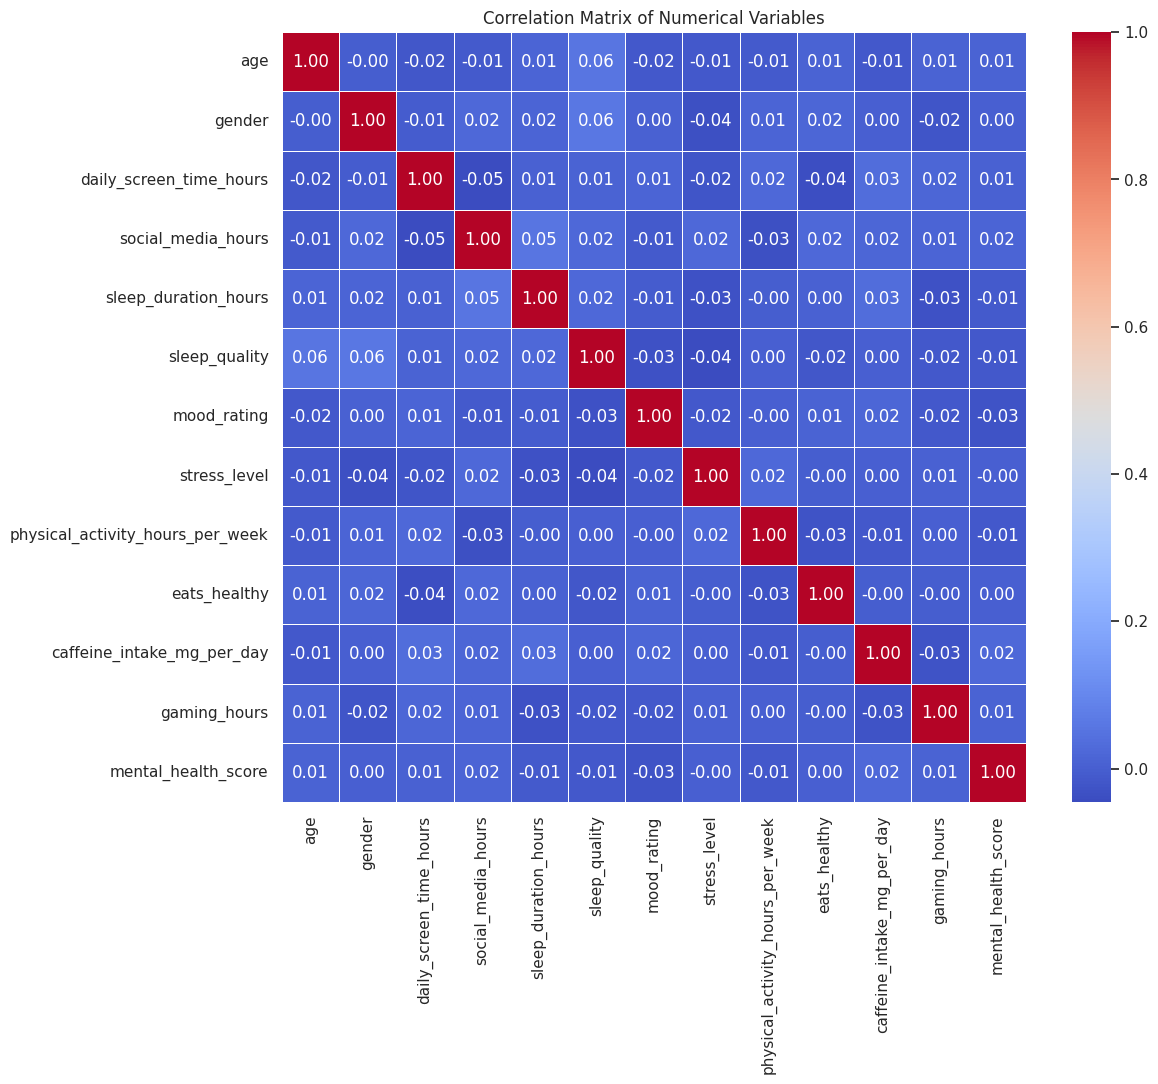

In [19]:
# Cell 8: Correlation Heatmap
print("\n--- Correlation Heatmap ---")

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation, numeric_only handles non-numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()